In [103]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

In [104]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

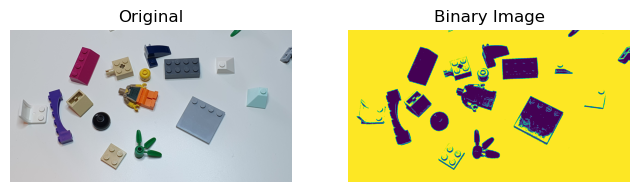

In [105]:
# Load the image (replace 'lego_4_small.png' with the actual path)
image = io.imread('lego_4_small.png')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's thresholding
threshold_value = threshold_otsu(gray_image)
binary_image = gray_image > threshold_value  # Binary image

# Display the original and binary images
show_comparison(image, binary_image, "Binary Image")

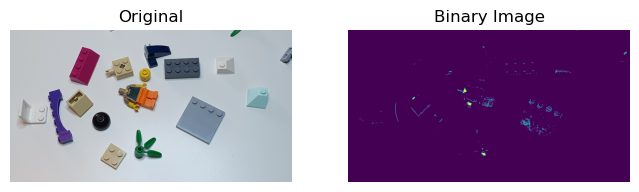

In [106]:
# Remove objects touching the border
cleaned_binary_image = segmentation.clear_border(binary_image)

# Display the original and binary images
show_comparison(image, cleaned_binary_image, "Binary Image")

In [107]:
from skimage.morphology import opening, closing, disk

# Create a disk-shaped structuring element with radius 5
selem = disk(5)

# Perform morphological closing to fill holes
closed_image = closing(cleaned_binary_image, selem)

# Perform morphological opening to remove small noise
final_cleaned_image = opening(closed_image, selem)

In [108]:
label_img = measure.label(final_cleaned_image)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 17


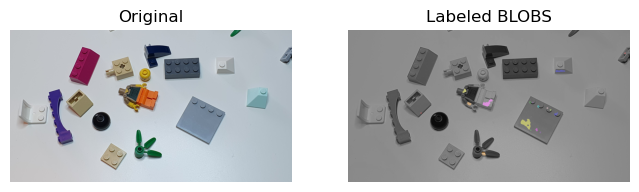

In [109]:
# Apply label2rgb to create a color visualization of the labeled blobs
image_label_overlay = label2rgb(label_img, image=image, bg_label=0)

# Display the original and labeled images
show_comparison(image, image_label_overlay, "Labeled BLOBS")

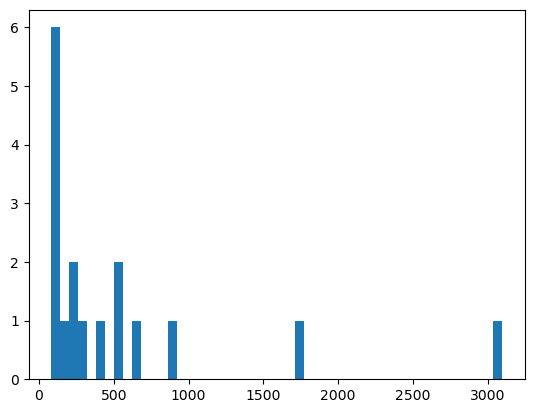

In [110]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

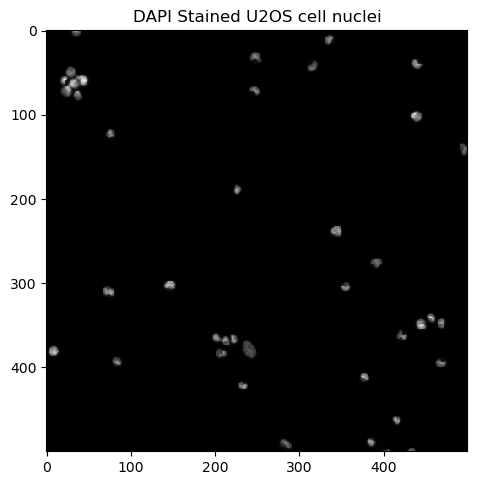

In [111]:
img_org = io.imread('Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

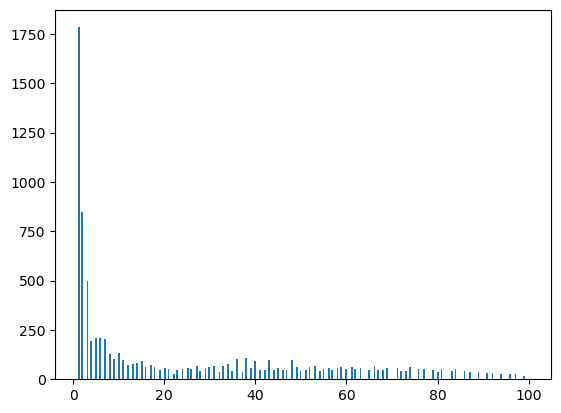

In [112]:
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

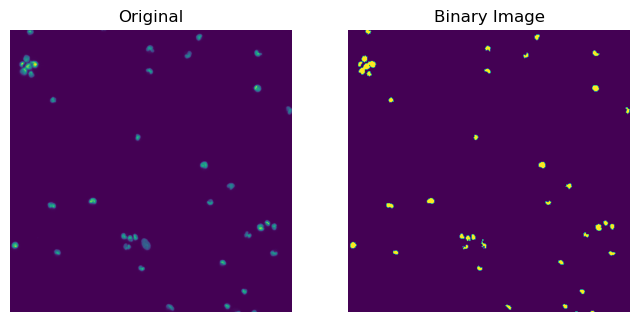

In [113]:
binary_image = img_gray > 40  # Binary image

# Display the original and binary images
show_comparison(img_small, binary_image, "Binary Image")

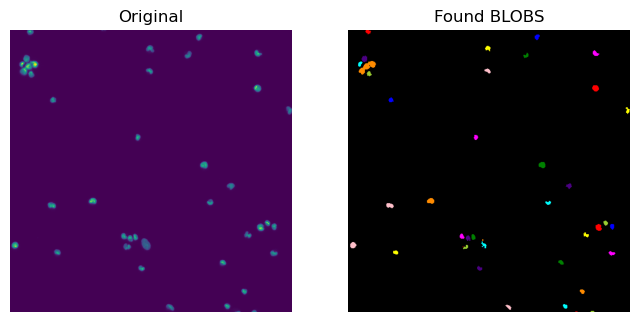

In [114]:
label_img = measure.label(binary_image)
image_label_overlay = label2rgb(label_img)
show_comparison(img_small, image_label_overlay, 'Found BLOBS')

In [115]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

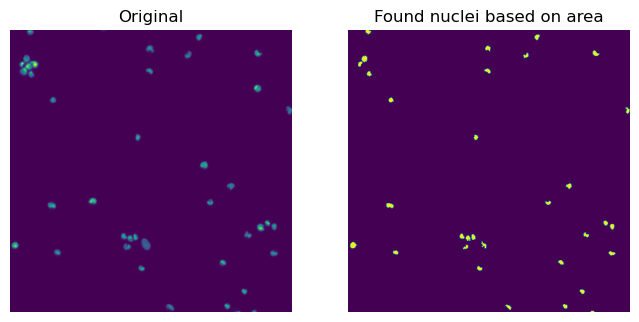

In [116]:
min_area = 10
max_area = 100

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

In [117]:
perimeters = np.array([prop.perimeter for prop in region_props])

In [118]:
shapes = [(4 * np.pi * areas[circ]) / perimeters[circ] for circ in range(len(perimeters))]

/var/folders/l4/cvtt5nrn021dbz6fwy92xdh00000gn/T/ipykernel_26731/1941519631.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  shapes = [(4 * np.pi * areas[circ]) / perimeters[circ] for circ in range(len(perimeters))]


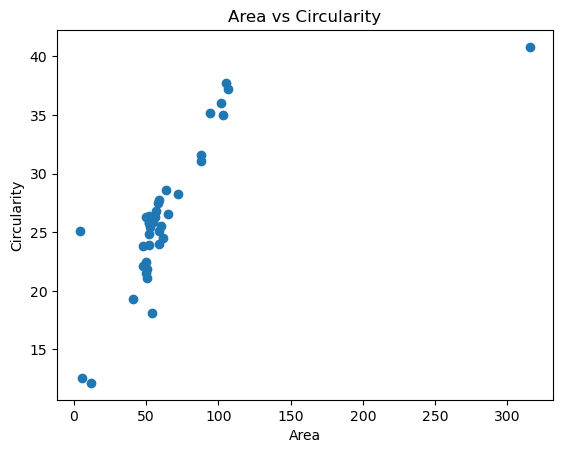

In [119]:
# Assuming 'areas' and 'circularities' are already calculated
plt.scatter(areas, shapes)  # 'shapes' is your circularity measure
plt.xlabel('Area')
plt.ylabel('Circularity')
plt.title('Area vs Circularity')
plt.show()

In [120]:
well_formed_nuclei = [shape for shape in shapes if 10 < shape < 30]  # Adjust threshold as needed
well_formed_count = len(well_formed_nuclei)

print(f"Number of well-formed nuclei: {well_formed_count}")

Number of well-formed nuclei: 31


In [121]:
# Example: Slicing the image into 4 regions and processing each one
height, width = img_org.shape[:2]
regions = [
    img_org[0:height//2, 0:width//2],   # Top-left
    img_org[0:height//2, width//2:],    # Top-right
    img_org[height//2:, 0:width//2],    # Bottom-left
    img_org[height//2:, width//2:],     # Bottom-right
]

# Apply your method to each region
for idx, region in enumerate(regions):
    # Process the region (e.g., thresholding, labeling, etc.)
    # Placeholder for your method, for each region
    print(f"Processing region {idx+1}")


Processing region 1
Processing region 2
Processing region 3
Processing region 4


Exercise 16 : repeat everything above from black picture

In [122]:
from skimage.morphology import opening, erosion, disk

# Apply erosion followed by dilation (opening) with a small structuring element
selem = disk(3)  # Adjust the size based on the image characteristics
opened_image = opening(cleaned_binary_image, selem)

# Proceed with labeling and analysis after opening
label_img = measure.label(opened_image)

In [123]:
from skimage.morphology import opening, erosion, disk

# Apply erosion followed by dilation (opening) with a small structuring element
selem = disk(3)  # Adjust the size based on the image characteristics
opened_image = opening(cleaned_binary_image, selem)

# Proceed with labeling and analysis after opening
label_img = measure.label(opened_image)